<a href="https://colab.research.google.com/github/Five-Star-Station/Hansol_QA/blob/main/train_EDA_Kihoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')


In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dacon/도배하자_QA/train.csv')
train_data.head()

,id,질문_1,질문_2,category,답변_1,답변_2,답변_3,답변_4,답변_5
0,TRAIN_000,면진장치가 뭐야?,면진장치에 사용되는 주요 기술은 무엇인가요?,건축구조,면진장치란 지반에서 오는 진동 에너지를 흡수하여 건물에 주는 진동을 줄여주는 진동 ...,"면진장치란 건물의 지반에서 발생하는 진동 에너지를 흡수하여 건물을 보호하고, 진동을...",면진장치란 지반으로부터 발생하는 진동 에너지를 흡수하여 건물에 전달되는 진동을 줄여...,면진장치는 건물의 지반으로부터 오는 진동 에너지를 흡수하여 건물에 전달되는 진동을 ...,면진장치는 건물에 오는 지반 진동의 영향을 최대한으로 흡수하여 건물에 전달되는 진동...
1,TRAIN_001,내진설계의 종류 좀 알려줘,내진설계에는 어떤 종류가 있는지 자세히 알려주실 수 있나요?,건축구조,"내진 설계의 종류로 내진구조, 제진구조, 면진구조가 있습니다.","내진설계에는 내진구조, 제진구조, 면진구조가 있습니다. 내진구조는 건물 구조물이 지...","내진설계에는 주로 내진구조, 제진구조, 면진구조의 세 가지 종류가 있습니다. 이들은...","내진설계에는 주로 내진구조, 제진구조, 면진구조가 사용됩니다. 내진구조는 건물 구조...","내진 설계에는 다양한 종류가 있지만, 대표적으로 내진구조, 제진구조, 면진구조가 있..."
2,TRAIN_002,철골구조의 장점이 뭐야?,철골구조의 장점을 알려줘?,건축구조,철골구조는 건물의 외벽에는 그다지 하중이 걸리지 않기 때문에 고층 건물의 건축이 가...,철골구조의 장점은 건물의 외벽에는 그다지 하중이 걸리지 않기 때문에 고층 건물의 건...,철골구조의 장점은 건물의 외벽에 하중이 적게 걸리기 때문에 고층 건물의 건축이 용이...,"철골구조의 장점은 건물의 외벽이 하중이 걸리지 않아 공간 활용이 용이하고, 고층 건...",철골구조의 장점은 건물의 외벽에 하중이 크게 걸리지 않아 고층 건물을 건축할 수 있...
3,TRAIN_003,철골철근 콘크리트 구조가 뭐야?,철골철근 콘크리트 구조의 장점과 단점에는 무엇이 있을까요?,건축구조,"철근철골콘크리트는 철골과 철근, 그리고 콘크리트를 함께 사용하는 건축 구조입니다. ...","철골철근콘크리트 구조는 건축물을 지탱하는 주요 구조물인 철골과 철근, 그리고 콘크리...",철골철근 콘크리트 구조는 건축물을 지탱하기 위한 구조물에서 일반적으로 사용되는 방식...,"철골철근콘크리트 구조는 철골과 철근, 그리고 콘크리트를 함께 사용하여 만들어지는 건...","철골철근 콘크리트 구조는 강철 골조와 강철 철근, 그리고 콘크리트를 함께 사용하여 ..."
4,TRAIN_004,철골구조는 어떤 방식이 있어?,철골구조의 다양한 방식이 무엇인가요?,건축구조,철골구조는 일반철골구조와 경량철골구조가 있습니다.,철골구조는 일반철골구조와 경량철골구조가 있습니다. 일반철골구조는 주로 대형 건물이나...,철골구조는 주로 일반철골구조와 경량철골구조로 나뉘어집니다. 이들은 건축 시스템에 따...,철골구조는 주로 일반철골구조와 경량철골구조로 구분됩니다. 이외에도 최근에는 고층 건...,철골구조는 일반철골구조와 경량철골구조 두 가지 방식이 주로 사용됩니다. 일반철골구조...


<Axes: >

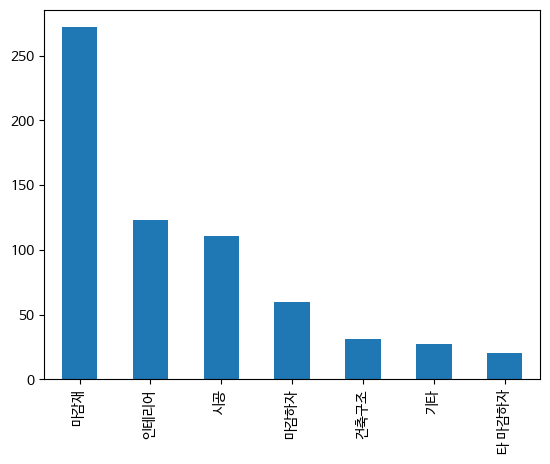

In [4]:
#categories bar chart
train_data['category'].value_counts().plot(kind='bar')



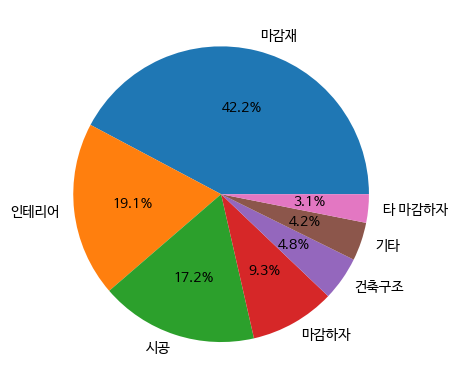

In [6]:
# categories piechart
category_piechart = train_data['category'].value_counts()

plt.pie(category_piechart, labels=category_piechart.index, autopct='%1.1f%%')
plt.show()

<Axes: title={'center': '질문_1'}, ylabel='Frequency'>

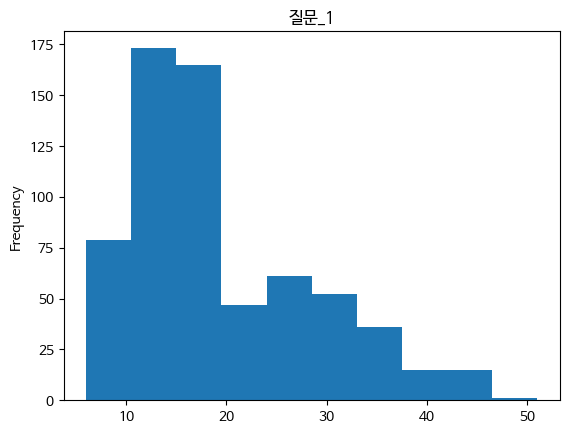

In [11]:
# length of question 1 data
train_data['질문_1'].apply(len).plot(kind='hist', title='질문_1')

<Axes: ylabel='Frequency'>

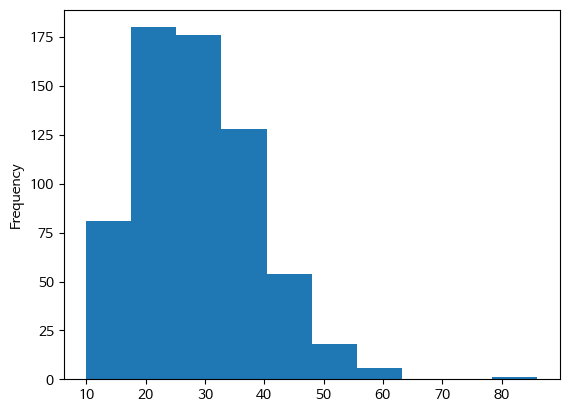

In [10]:
# length of question_2 data
train_data['질문_2'].apply(len).plot(kind='hist')

Index(['id', '질문_1', '질문_2', 'category', '답변_1', '답변_2', '답변_3', '답변_4',
       '답변_5'],
      dtype='object')


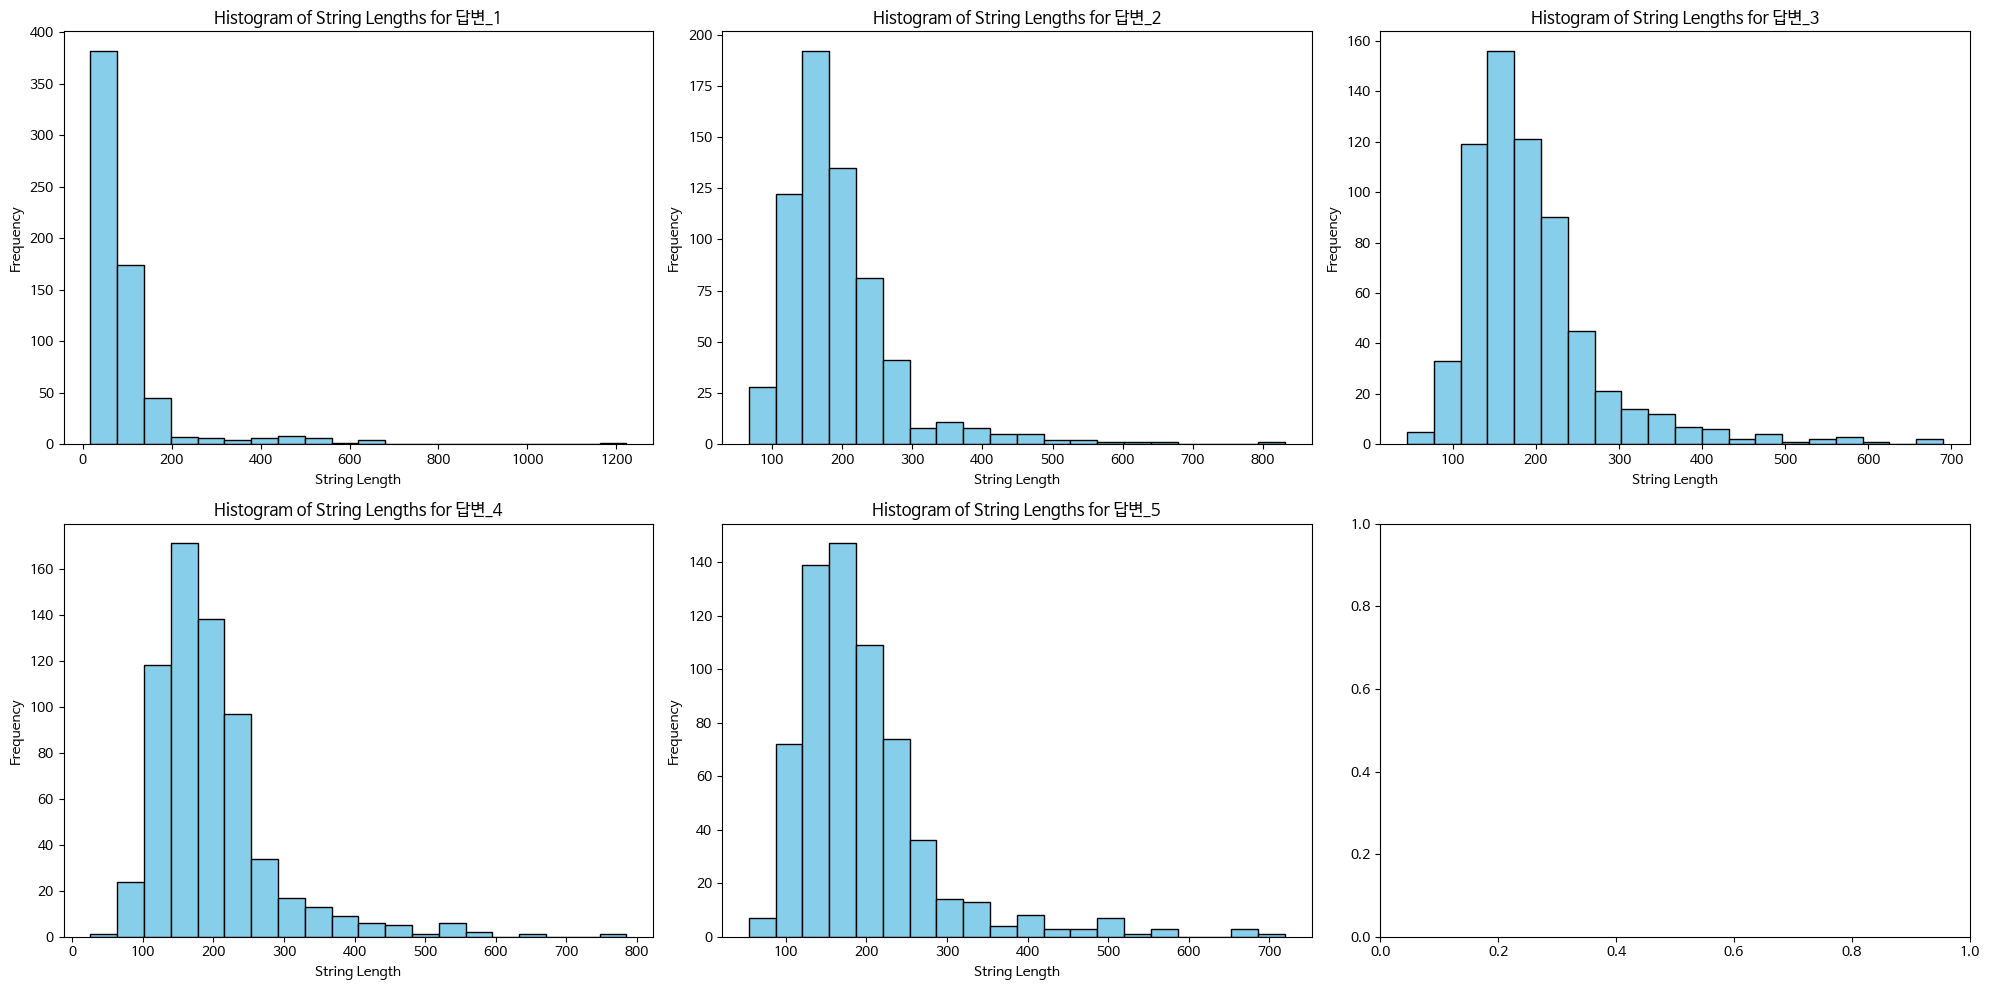

In [21]:
# length of answer 1,2,3,4,5 histogram subplots

# Create subplots for each column
print(train_data.columns)
num_cols = len(train_data.columns[4:])
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs = axs.flatten()

# Plot histograms for string lengths in each column
for i, col in enumerate(train_data.columns[4:]):
    # Calculate string lengths for non-null values
    lengths = train_data[col].dropna().apply(len)

    # Plot histogram
    axs[i].hist(lengths, bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of String Lengths for {col}')
    axs[i].set_xlabel('String Length')
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

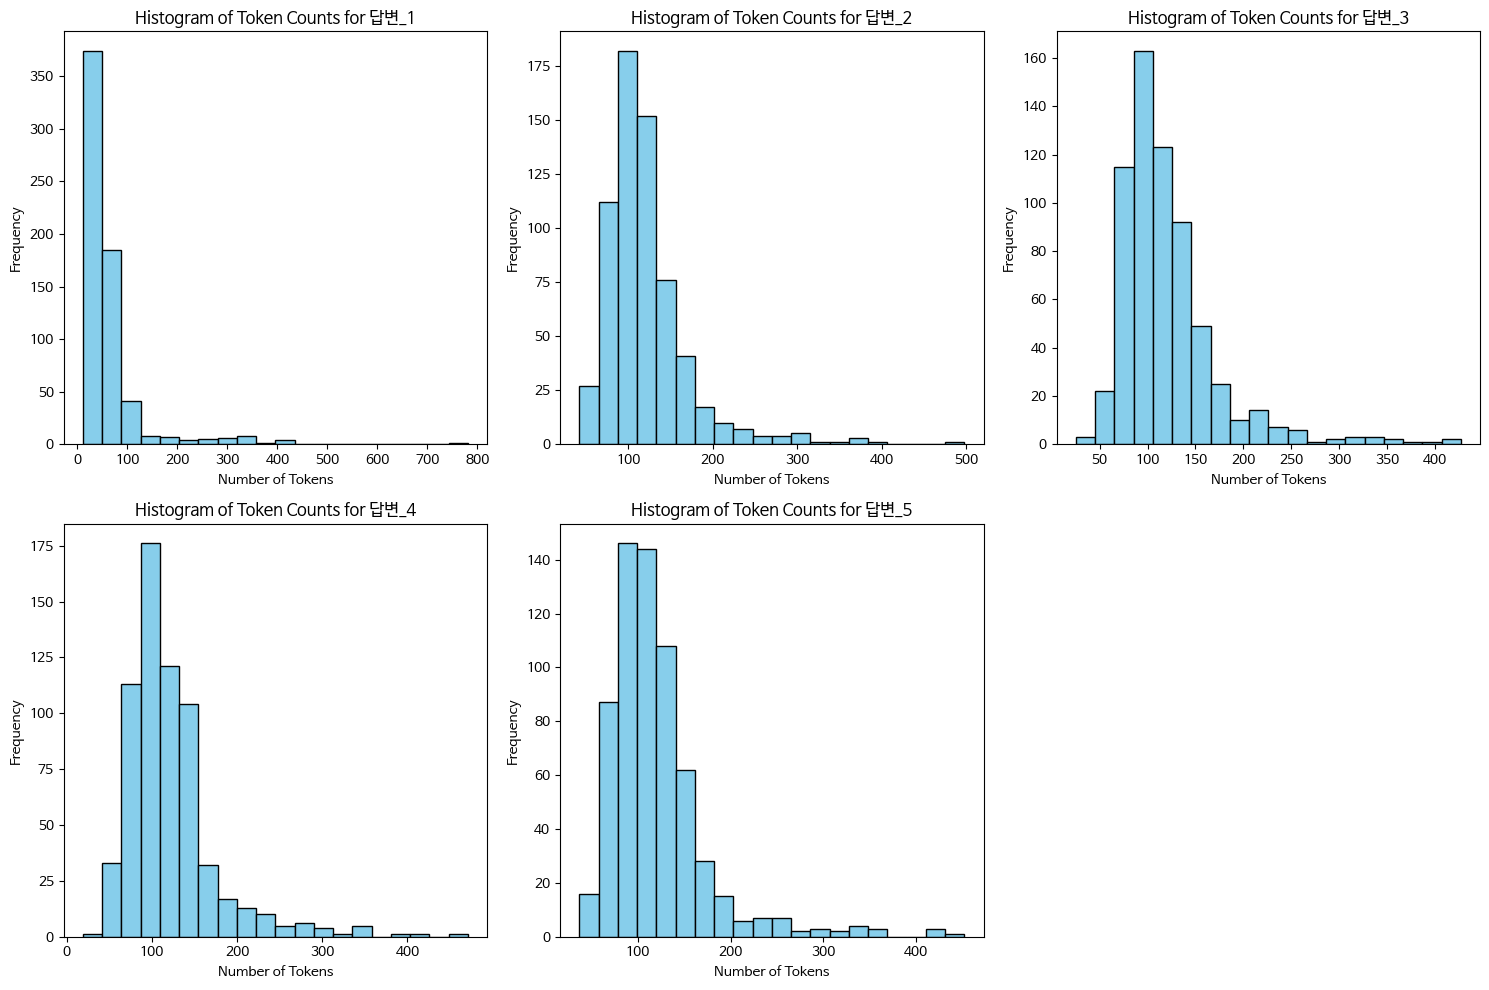

In [22]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')


# Create subplots for each column
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Tokenize strings and plot histograms for token counts in each column
for i, col in enumerate(train_data.columns[4:]):
    # Tokenize strings
    tokens = train_data[col].dropna().apply(lambda x: tokenizer.tokenize(x))

    # Calculate token counts
    token_counts = tokens.apply(len)

    # Plot histogram
    axs[i].hist(token_counts, bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of Token Counts for {col}')
    axs[i].set_xlabel('Number of Tokens')
    axs[i].set_ylabel('Frequency')

# Hide any remaining subplots
for i in range(len(train_data.columns[4:]), len(axs)):
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
